In [1]:
import json 
import matplotlib.pyplot as plt

In [11]:
with open('../Annotations/fho_oscc-pnr_train.json','r') as f:
    oscc_train_json=json.load(f)
with open('../Annotations/fho_oscc-pnr_val.json') as f:
    oscc_val_json=json.load(f)    
with open('../Annotations/fho_oscc-pnr_test_unannotated.json') as f:
    oscc_test_json=json.load(f)    

### clip pnr frame과 parent pnr frame 뭐가 다른지 check

#### --> parent는 해당 video id 기준 frame이고, clip pnr frame은 해당 clip frame이다.



In [7]:
for clip in oscc_train_json["clips"]:
    if clip["clip_pnr_frame"] != clip["parent_pnr_frame"]:
        print("exist different clip_pnr_frame and parent_pnr_fame clip at least one");break

exist different clip_pnr_frame and parent_pnr_fame clip at least one


## Train Val Test num distribution

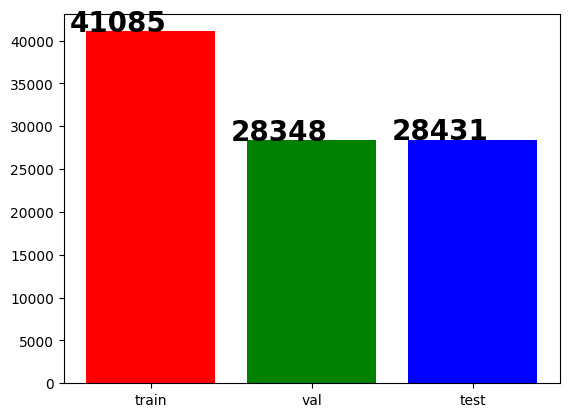

In [22]:
train_length = len(oscc_train_json['clips'])
val_length = len(oscc_val_json['clips'])
test_length = len(oscc_test_json['clips'])
plt.bar([1,2,3], [train_length, val_length, test_length],color=['r','g','b'])
plt.xticks([1,2,3], ['train', 'val', 'test'])
for i, v in enumerate([train_length,val_length,test_length]):
    plt.text(i+0.5, v, str(v), color='black', fontweight='bold',fontsize=20)

plt.show()

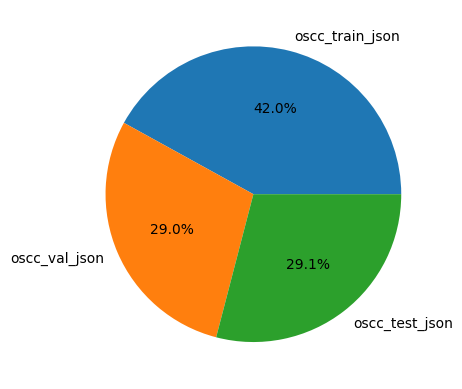

In [23]:
plt.pie([len(oscc_train_json["clips"]),(len(oscc_val_json["clips"])),(len(oscc_test_json["clips"]))],labels=['oscc_train_json','oscc_val_json','oscc_test_json'],autopct='%1.1f%%')
plt.show()


## True false Distribution

In [33]:
train_T,train_F=0,0
val_T, val_F=0,0
oscc_train_json["clips"][0]["state_change"]

True

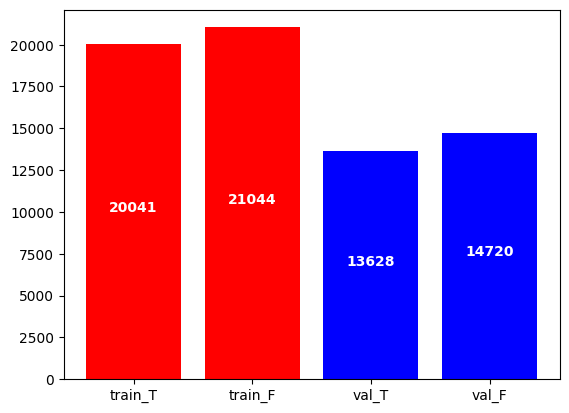

In [42]:
train_T,train_F,val_T,val_F=0,0,0,0
for clip in oscc_train_json["clips"]:
    if clip["state_change"]:
        train_T+=1
    else:
        train_F+=1
for clip in oscc_val_json["clips"]:
    if clip["state_change"]:
        val_T+=1
    else:
        val_F+=1

values = [train_T,train_F,val_T,val_F]

# create the bar graph
plt.bar(['train_T','train_F','val_T','val_F'], values, color=['r','r','b','b'])

# add value numbers over the center of each bar
for i, v in enumerate(values):
    plt.text(i, v/2, str(v), color='white', fontweight='bold', ha='center')

# show the graph
plt.show()